In [1]:
input_file = "gpmh.out"

import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow_probability as tfp

import sys

sys.path.append("/Users/jay/Desktop/Bachelorarbeit/Implementation")
from src.execute_model import run_model_single_parameter_node
from src.construct_model import get_model


ndims = 7
dims = ["TT", "C0", "beta", "ETF", "FC", "FRAC", "K2"]
colors = sns.color_palette(n_colors=ndims)

testConfigPath = "/Users/jay/Desktop/Bachelorarbeit/test_config.json"
with open(testConfigPath, "r") as file:
    run_config = json.load(file)

configPath = run_config["configPath"]
basis = run_config["basis"]
model = get_model(configPath, basis)

start_date: 2004-01-01 00:00:00
start_date_predictions: 2005-01-01 00:00:00
end_date: 2006-01-01 00:00:00
simulation length: 365
full_data_range is 732 hours including spin_up_length of 366 hours
simulation_range is of length 366 hours


In [2]:
# Construct params
configurationObject = model.configurationObject
param_lower = []
param_upper = []
for param in configurationObject["parameters"]:
    if param["distribution"] == "Uniform":
        param_lower.append(param["lower"])
        param_upper.append(param["upper"])
    else:
        raise NotImplementedError(
            f"Sorry, the distribution {param['distribution']} is not supported yet"
        )
param_lower = np.array(param_lower)
param_upper = np.array(param_upper)


def displot(i, data):
    # Plot prior distribution
    uni = tfp.distributions.Uniform(low=param_lower[i], high=param_upper[i])
    x = np.linspace(param_lower[i], param_upper[i], 25000)
    y = uni.prob(x)

    # Configuration
    plt.plot(x, y, label="pdf", color="grey")
    plt.title(f"PDF of parameter {dims[i]}")
    plt.show()


def boxplot(i, data):
    sns.boxplot(data, x=dims[i], color=colors[i])
    plt.title(f"Boxplot of parameter {dims[i]}")

In [3]:
samples = pd.read_csv(f"../notebook_data/{input_file}")
samples

,TT,C0,beta,ETF,FC,FRAC,K2
0,1.360872,0.739822,2.401282,0.869939,104.921725,0.330667,0.039990
1,0.667874,0.438956,2.527263,0.857266,89.304514,0.252571,0.032241
2,1.360872,0.739822,2.401282,0.869939,104.921725,0.330667,0.039990
3,-0.495808,0.379054,2.844501,0.929499,112.378282,0.218222,0.041184
4,1.360872,0.739822,2.401282,0.869939,104.921725,0.330667,0.039990
...,...,...,...,...,...,...,...
7995,1.754492,0.776811,2.667040,0.002158,103.462480,0.281766,0.045531
7996,1.754492,0.776811,2.667040,0.002158,103.462480,0.281766,0.045531
7997,1.754492,0.776811,2.667040,0.002158,103.462480,0.281766,0.045531
7998,1.754492,0.776811,2.667040,0.002158,103.462480,0.281766,0.045531


# Plotting

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

2024-05-20 10:41:50.406726: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-05-20 10:41:50.406749: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-05-20 10:41:50.406754: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-05-20 10:41:50.406772: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-20 10:41:50.406785: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


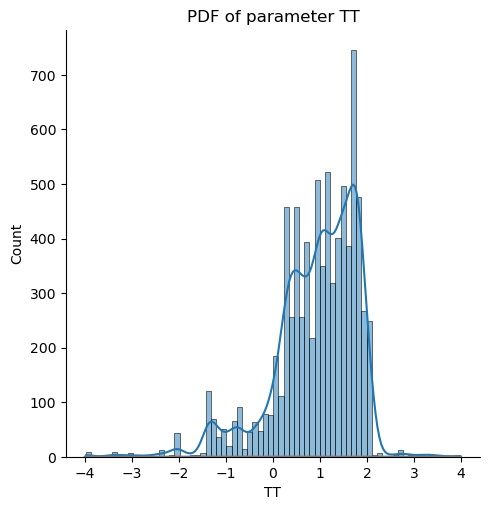

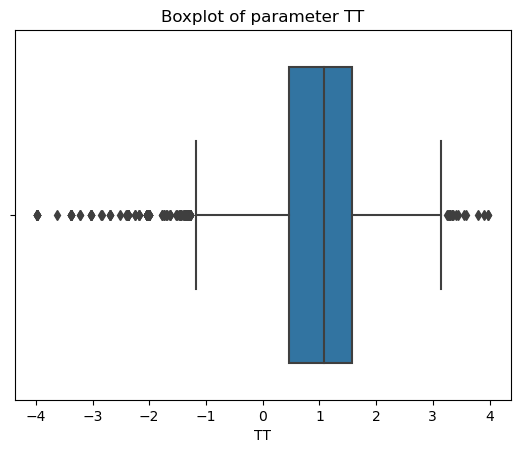

In [4]:
# Plot TT
displot(0, samples)
boxplot(0, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



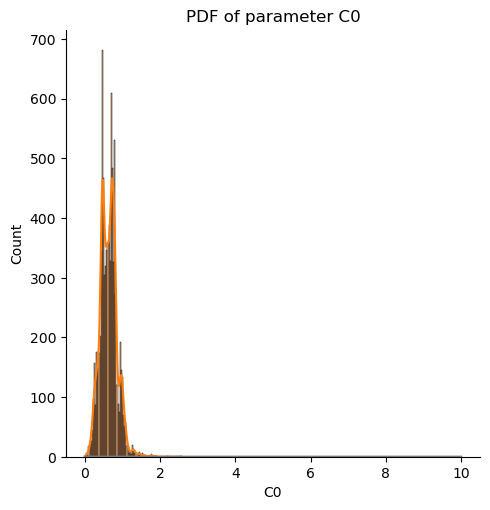

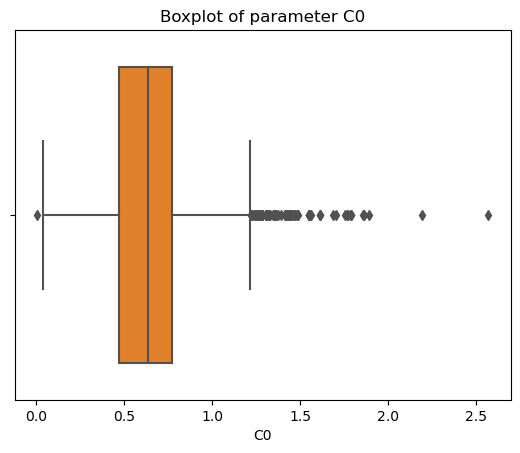

In [5]:
# Plot TT
displot(1, samples)
boxplot(1, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



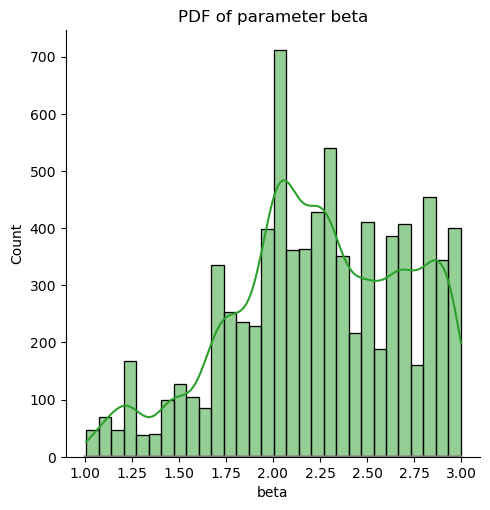

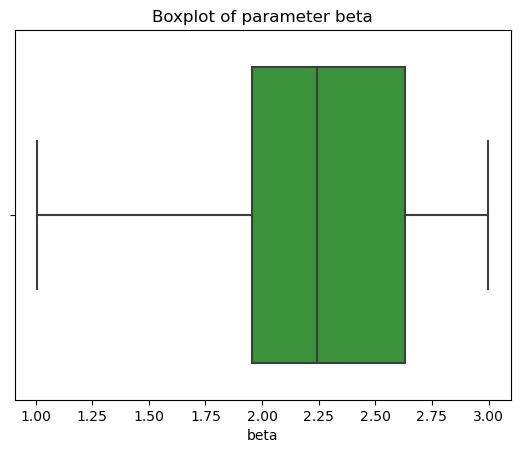

In [6]:
# Plot TT
displot(2, samples)
boxplot(2, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



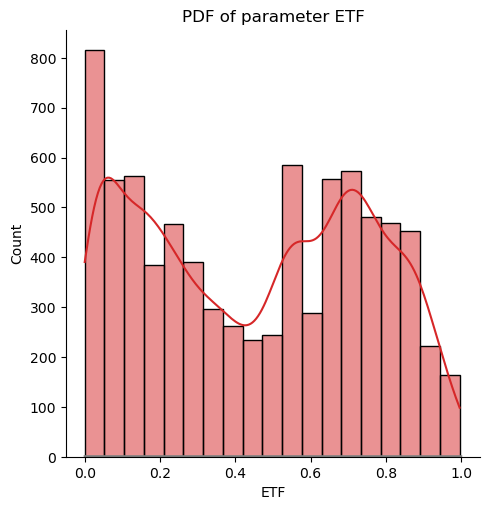

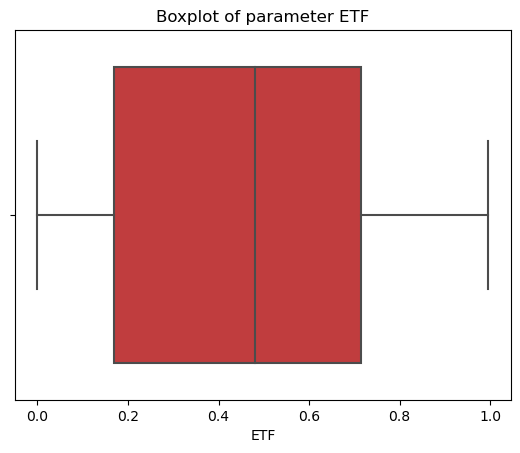

In [7]:
displot(3, samples)
boxplot(3, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



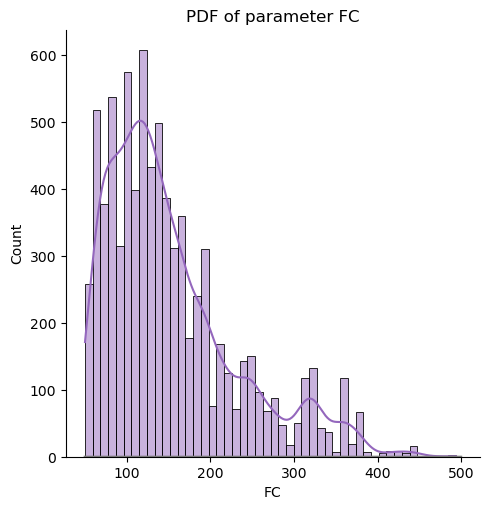

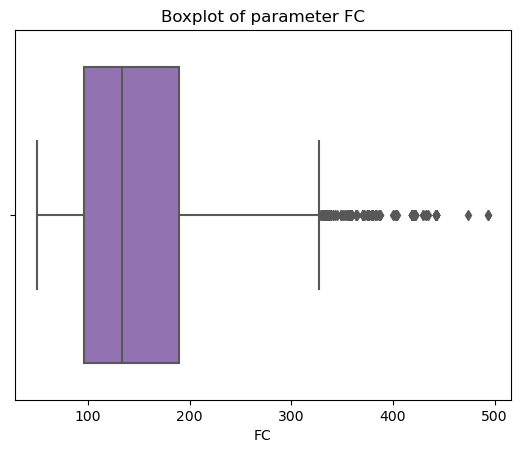

In [8]:
displot(4, samples)
boxplot(4, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



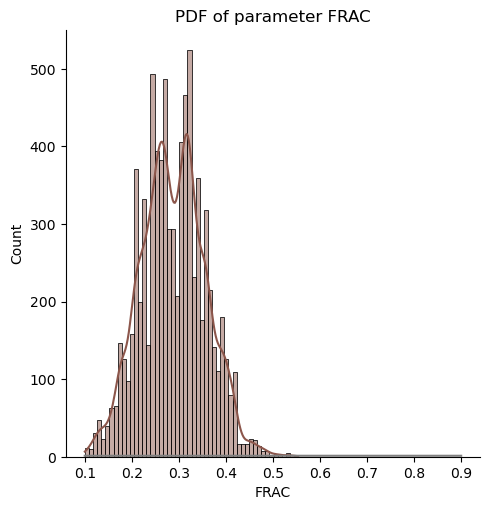

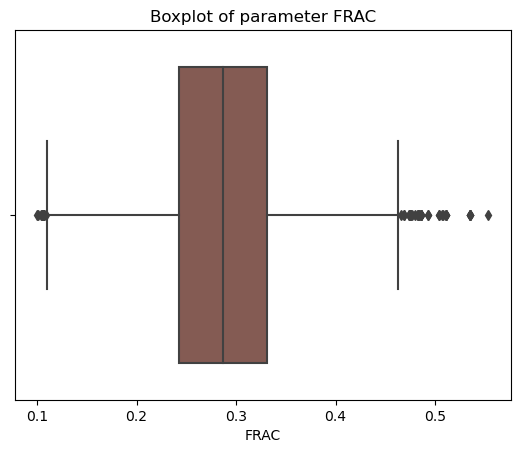

In [9]:
displot(5, samples)
boxplot(5, samples)

/Users/jay/miniconda3/envs/hbv_uq_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



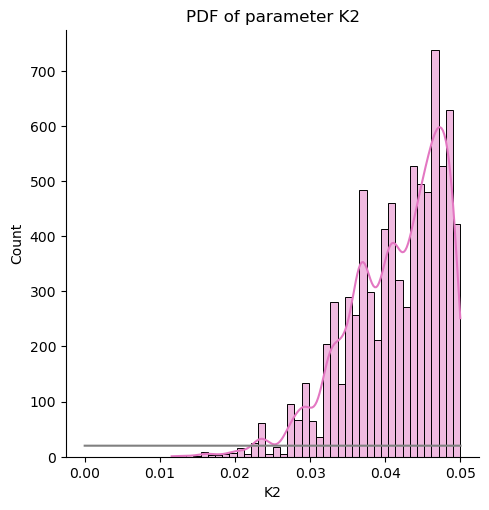

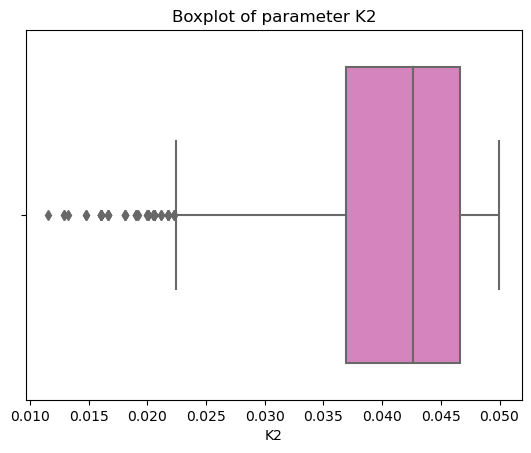

In [10]:
displot(6, samples)
boxplot(6, samples)

# Sampling

In [11]:
# Sampling Max
param_vec = []
for i in range(len(samples.loc[0])):
    values, counts = np.unique(samples.iloc[:, i], return_counts=True)
    ind = np.argmax(counts)
    param_vec.append(values[ind])

_, sampled_max, _, _ = run_model_single_parameter_node(model, param_vec)

[HVBSASK INFO] [0] parameters: [[0.2995071400051679, 0.4757821338550194, 2.499906160768278, 0.8841219971284391, 67.3087930893754, 0.24225585122633908, 0.03311596079126349]]


In [12]:
# Mean Sampling from MCMC
sample_param = []
for i in range(7):
    sample_param.append(np.random.choice(samples.iloc[:, i], 1000))
sample_param = np.array(sample_param).T

all_results = []
for _, vec in enumerate(sample_param):
    _, y_model, _, _ = run_model_single_parameter_node(model, np.array(vec))
    all_results.append(y_model)

print(np.array(all_results).shape)
sampled_column_means = np.mean(np.array(all_results), axis=0)

[HVBSASK INFO] [0] parameters: [array([1.54023321e+00, 2.45584424e-01, 2.45696057e+00, 8.81351690e-01,
       2.90152963e+02, 2.45929239e-01, 4.37241410e-02])]
[HVBSASK INFO] [0] parameters: [array([1.05357194e+00, 3.53855299e-01, 2.24146626e+00, 9.62868204e-01,
       1.57031041e+02, 1.13829598e-01, 3.57367676e-02])]
[HVBSASK INFO] [0] parameters: [array([1.44488603e+00, 6.75856267e-01, 2.17489332e+00, 6.51696658e-01,
       1.19539816e+02, 2.55610373e-01, 4.08175285e-02])]
[HVBSASK INFO] [0] parameters: [array([7.28280921e-01, 6.90925960e-01, 2.05433225e+00, 1.63747019e-01,
       1.16607409e+02, 3.77795782e-01, 3.88163726e-02])]
[HVBSASK INFO] [0] parameters: [array([1.82978562e+00, 5.81855801e-01, 2.63280203e+00, 1.77647448e-02,
       7.12401331e+01, 3.56226566e-01, 4.37241410e-02])]
[HVBSASK INFO] [0] parameters: [array([1.83474632e+00, 7.86163051e-01, 2.21716997e+00, 5.99753392e-02,
       2.18139973e+02, 2.81766259e-01, 4.42357595e-02])]
[HVBSASK INFO] [0] parameters: [array([-

In [13]:
# Mean Sampling from Start
sample_param = []
for i in range(7):
    uni = tfp.distributions.Uniform(low=param_lower[i], high=param_upper[i]).sample(1)
    sample_param.append(uni)
sample_param = np.array(sample_param).T

all_results = []
for _, vec in enumerate(sample_param):
    _, y_model, _, _ = run_model_single_parameter_node(model, np.array(vec))
    all_results.append(y_model)

_, _, measured_data, _ = run_model_single_parameter_node(model, np.array(vec))

start_column_means = np.mean(np.array(all_results), axis=0)

[HVBSASK INFO] [0] parameters: [array([6.43395715e-01, 4.31117656e+00, 1.07279784e+00, 2.01132674e-01,
       3.44045505e+02, 2.76701309e-01, 2.31219208e-02])]
[HVBSASK INFO] [0] parameters: [array([6.43395715e-01, 4.31117656e+00, 1.07279784e+00, 2.01132674e-01,
       3.44045505e+02, 2.76701309e-01, 2.31219208e-02])]


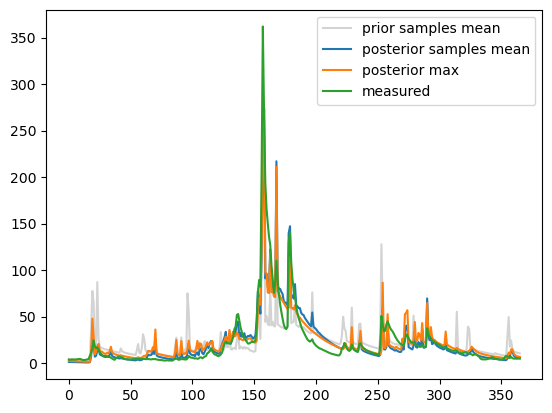

In [14]:
fig = plt.figure()
plt.plot(start_column_means, label="prior samples mean", color="lightgrey")
plt.plot(sampled_column_means, label="posterior samples mean")
plt.plot(sampled_max, label="posterior max")
plt.plot(measured_data, label="measured")
plt.legend()
plt.show()

In [15]:
t = (all_results - measured_data)[0]

s = 0
for i in range(len(t)):
    s += t[i] ** 2
rmse = (s / (len(t))) ** 0.5
rmse

24.096650356344153

In [16]:
t = sampled_max - measured_data

s = 0
for i in range(len(t)):
    s += t[i] ** 2
rmse = (s / (len(t))) ** 0.5
rmse

16.267932938161362

In [17]:
t = np.absolute(sampled_column_means - measured_data)

t.mean()

7.4934214706066244

In [18]:
t = np.absolute(sampled_max - measured_data)

t.mean()

8.77511894685505